# Interpretability and Model Behavior Analysis

In [1]:
import matplotlib.pyplot as plt
import sys, os
sys.path.append(os.path.abspath(".."))

from src.plotting import plot_PCA

%store -r dataset
%store -r results

X = dataset[0]
z_true = dataset[1]
difficulty = dataset[2]
X_pca = dataset[3]
split = dataset[4]

ari_kmeans = results[0]
z_kmeans = results[1]

ari_gmm = results[2]
z_gmm = results[3]

ari_hmm = results[4]
z_hmm = results[5]

ari_rf = results[6]
acc_rf = results[7]
z_rf = results[8]

ari_mlp = results[9]
acc_mlp = results[10]
z_mlp = results[11]

ari_xg = results[12]
acc_xg = results[13]
z_xg = results[14]

In [2]:
preds = {
    'KMeans': z_kmeans,
    'GMM': z_gmm,
    'HMM': z_hmm,
}
preds_2 = {
    'Random Forest': z_rf,
    'Shallow NN (MLP)': z_mlp,
    'XGBoost': z_xg
    }

ari = {
    'KMeans' : ari_kmeans,
    'GMM' : ari_gmm,
    'HMM' : ari_hmm,
    'Random Forest': ari_rf,
    'Shallow NN (MLP)': ari_mlp,
    'XGBoost': ari_xg
    }

acc = {
    'Random Forest': acc_rf,
    'Shallow NN (MLP)': acc_mlp,
    'XGBoost': acc_xg
    }

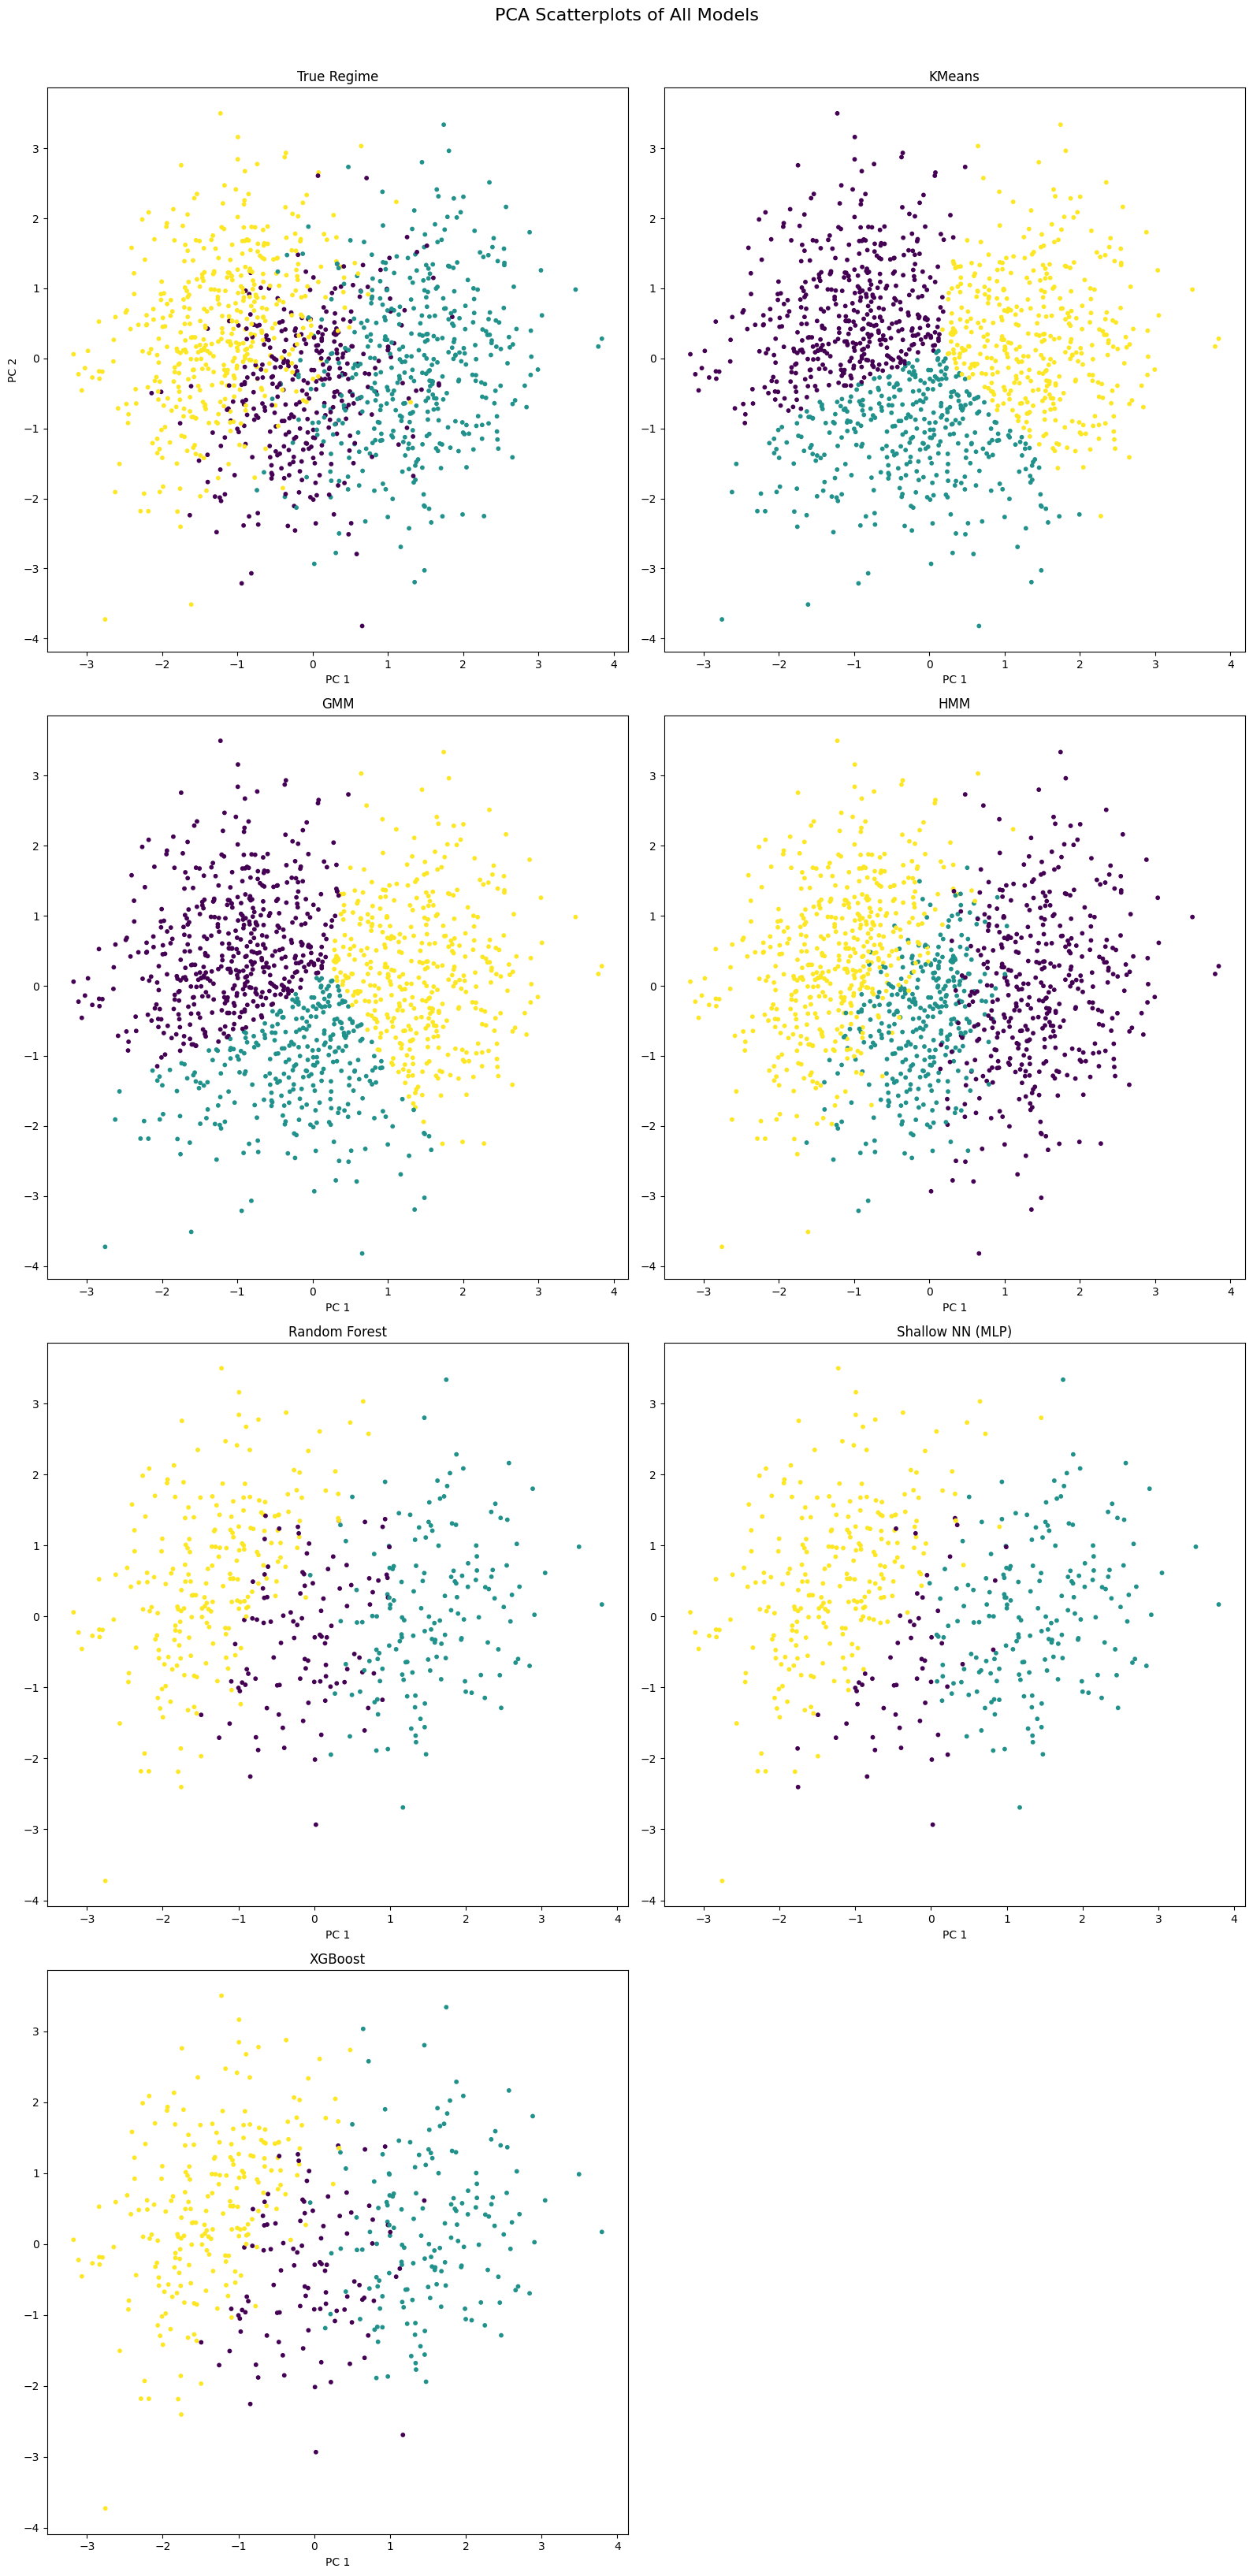

In [3]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(4, 2, figsize=(16, 32))
axes = axes.flatten()

# True regime plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=z_true, s=10)
axes[0].set_title('True Regime')
axes[0].set_xlabel('PC 1')
axes[0].set_ylabel('PC 2')

# Unsupervised model plots
i = 1
for name, z in preds.items():
    axes[i].scatter(X_pca[:, 0], X_pca[:, 1], c=z, s=10)
    axes[i].set_title(name)
    axes[i].set_xlabel('PC 1')
    i += 1

# Supervised model plots
for j, (name, z) in enumerate(preds_2.items()):
    ax_idx = 4 + j
    axes[ax_idx].scatter(X_pca[split:, 0], X_pca[split:, 1], c=z, s=10)
    axes[ax_idx].set_title(name)
    axes[ax_idx].set_xlabel('PC 1')

for k in range(4 + len(preds_2), len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.suptitle('PCA Scatterplots of All Models', y=1.02, fontsize=16)
plt.savefig("../figures/06_PCA_All_Models.png", dpi=300, bbox_inches='tight')
plt.show()

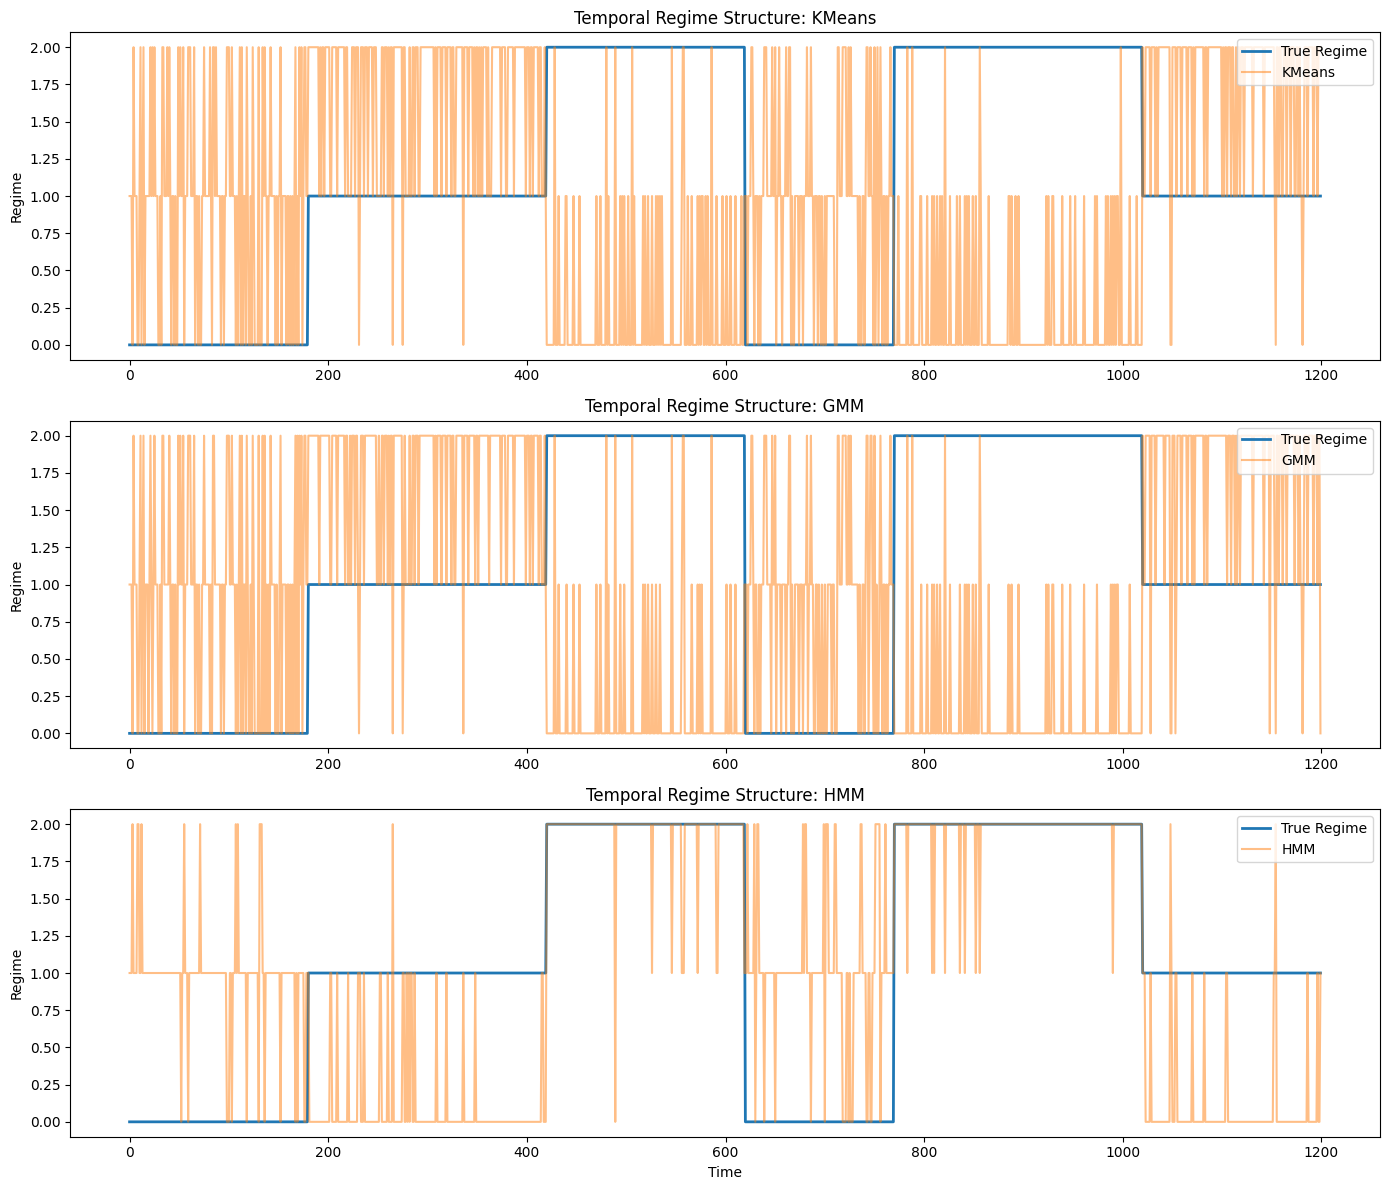

In [4]:
import matplotlib.pyplot as plt

# Combine unsupervised models into one time-series subplot grid

n_models = len(preds)
fig, axes = plt.subplots(n_models, 1, figsize=(14, 4 * n_models))

if n_models == 1:
    axes = [axes]

for idx, (name, z) in enumerate(preds.items()):
    axes[idx].plot(z_true, label='True Regime', linewidth=2, alpha=1.0)
    axes[idx].plot(z, label=name, alpha=0.5, linewidth=1.5)
    axes[idx].set_title(f'Temporal Regime Structure: {name}')
    axes[idx].set_ylabel('Regime')
    axes[idx].legend(loc='upper right')

axes[-1].set_xlabel('Time')
plt.tight_layout()
plt.savefig("../figures/06_Temporal_Regime_UML.png", dpi=300, bbox_inches='tight')
plt.show()

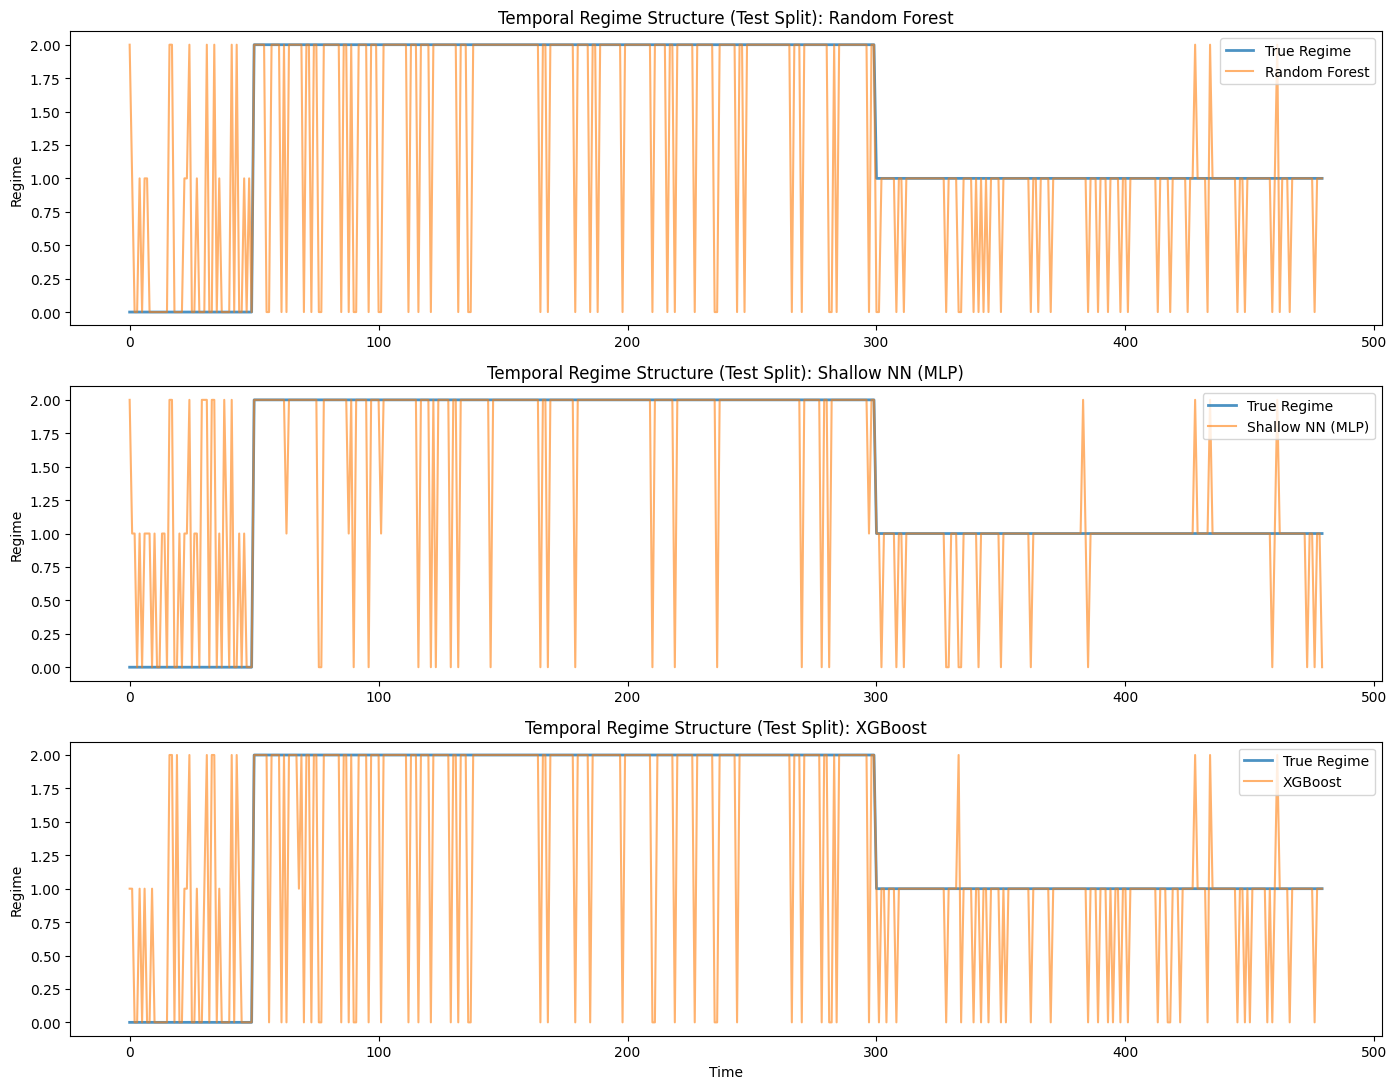

In [5]:
# Combine supervised models into one time-series subplot grid

fig, axes = plt.subplots(3, 1, figsize=(14, 11))

for idx, (name, z) in enumerate(preds_2.items()):
    axes[idx].plot(z_true[split:], label='True Regime', linewidth=2, alpha=0.8)
    axes[idx].plot(z, label=name, alpha=0.6, linewidth=1.5)
    axes[idx].set_title(f'Temporal Regime Structure (Test Split): {name}')
    axes[idx].set_ylabel('Regime')
    axes[idx].legend(loc='upper right')

axes[-1].set_xlabel('Time')
plt.tight_layout()
plt.savefig("../figures/06_Temporal_Regime_SML.png", dpi=300, bbox_inches='tight')
plt.show()

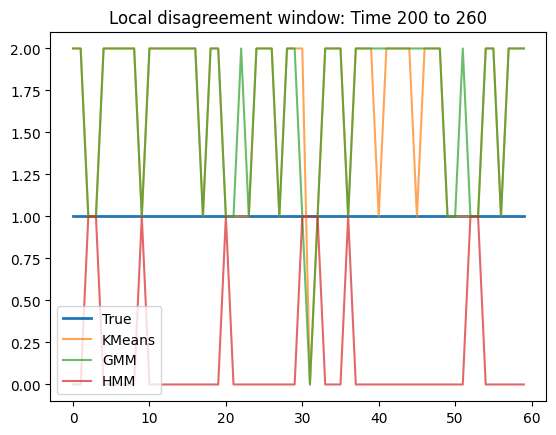

In [6]:
t0, t1 = 200, 260
plt.plot(z_true[t0:t1], label="True", linewidth=2)
for name, z in preds.items():
    plt.plot(z[t0:t1], label=name, alpha=0.7)
plt.legend()
plt.title(f"Local disagreement window: Time {t0} to {t1}")
plt.show()


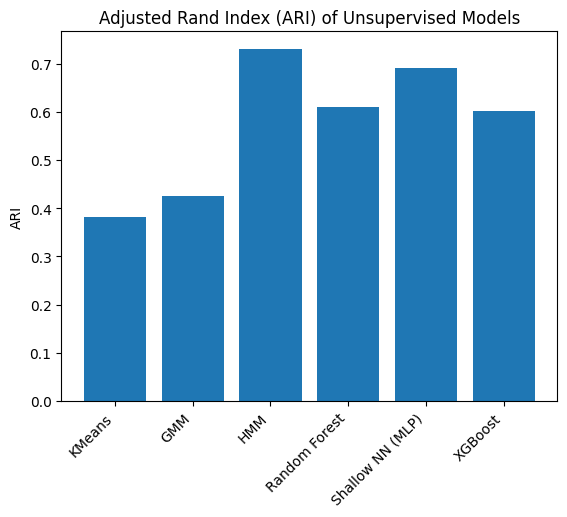

In [7]:
plt.bar(range(len(ari)), ari.values())
plt.xticks(ticks = range(len(ari)), labels = ari.keys(), rotation=45, ha='right')
plt.ylabel("ARI")
plt.title("Adjusted Rand Index (ARI) of Unsupervised Models")
plt.savefig("../figures/06_ARI_Model_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()

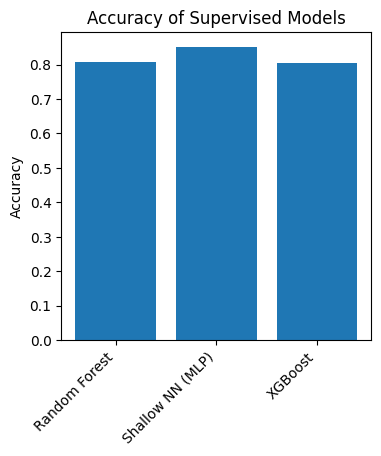

In [8]:
plt.figure(figsize=(4, 4))
plt.bar(range(len(acc)), acc.values())
plt.xticks(ticks = range(len(acc)), labels = acc.keys(), rotation=45, ha='right')
plt.ylabel("Accuracy")
plt.title("Accuracy of Supervised Models")
plt.savefig("../figures/06_Accuracy_Model_Comparison.png", dpi=300, bbox_inches='tight')
plt.show()